# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs and uses UUIDs to transfer content across tools and agents. 

This example uses Steamship to generate and store generated images. Generated are auth protected by default. 

You can get your Steamship api key here: https://steamship.com/account/api

In [4]:
# !pip install steamship 
# !pip install langchainhub

     ---------------------------------------- 0.0/153.0 kB ? eta -:--:--
     --------- --------------------------- 41.0/153.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 153.0/153.0 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
     ---------------------------------------- 49.3/49.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/254.3 kB ? eta -:--:--
   --------------------------------------- 254.3/254.3 kB 15.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/329.0 kB ? eta -:--:--
   --------------------------------------- 329.0/329.0 kB 21.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.1/2.2 MB 34.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 28.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.8 kB ? eta -:--:--
   ------------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.20.0 requires requests>=2.32.2, but you have requests 2.28.2 which is incompatible.
jupyterlab-server 2.25.1 requires requests>=2.31, but you have requests 2.28.2 which is incompatible.
langchain-openai 0.1.13 requires tiktoken<1,>=0.7, but you have tiktoken 0.4.0 which is incompatible.


In [5]:
import re

from IPython.display import Image, display
from steamship import Block, Steamship

In [6]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [11]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')
STEAMSHIP_API_KEY = os.getenv('STEAMSHIP_API_KEY')

In [12]:
llm = OpenAI(temperature=0)

## Dall-E 

In [13]:
class SteamshipImageGenerationTool(OriginalSteamshipImageGenerationTool):
    pass
SteamshipImageGenerationTool.update_forward_refs()

In [14]:
tools = [SteamshipImageGenerationTool(model_name="dall-e")]

In [28]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# prompt = hub.pull("hwchase17/react")
# agent = create_react_agent(llm=llm, tools=tools, prompt=prompt)
# agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [29]:
output = mrkl.invoke("How would you visualize a parrot playing soccer?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot with colorful feathers playing soccer on a green field with a ball at its feet."
Observation: 6B787694-B7BE-4B57-8FE0-9EB3489EBC1E
Thought: I should use the UUID to retrieve the generated image.
Action: retrieve_image
Action Input: 6B787694-B7BE-4B57-8FE0-9EB3489EBC1E
Observation: retrieve_image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot with colorful feathers playing soccer on a green field with a ball at its feet."
Observation: 9BF89AFF-C06B-45B0-9D1F-95B93D31F4EF
Thought: I should use the UUID to retrieve the generated image.
Action: retrieve_image
Action Input: 9BF89AFF-C06B-45B0-9D1F-95B93D31F4EF
Observation: retrieve_image is not a valid tool, try one of [generate_im

In [30]:
def show_output(output):
    """Display the multi-modal output from the agent."""
    UUID_PATTERN = re.compile(
        r"([0-9A-Za-z]{8}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{12})"
    )

    outputs = UUID_PATTERN.split(output)
    outputs = [
        re.sub(r"^\W+", "", el) for el in outputs
    ]  # Clean trailing and leading non-word characters

    for output in outputs:
        maybe_block_id = UUID_PATTERN.search(output)
        if maybe_block_id:
            display(Image(Block.get(Steamship(), _id=maybe_block_id.group()).raw()))
        else:
            print(output, end="\n\n")

In [31]:
output

{'input': 'How would you visualize a parrot playing soccer?',
 'output': 'The final answer is the UUID 9BF89AFF-C06B-45B0-9D1F-95B93D31F4EF, which can be used to retrieve the generated image of a parrot playing soccer.'}

The final answer is the UUID 



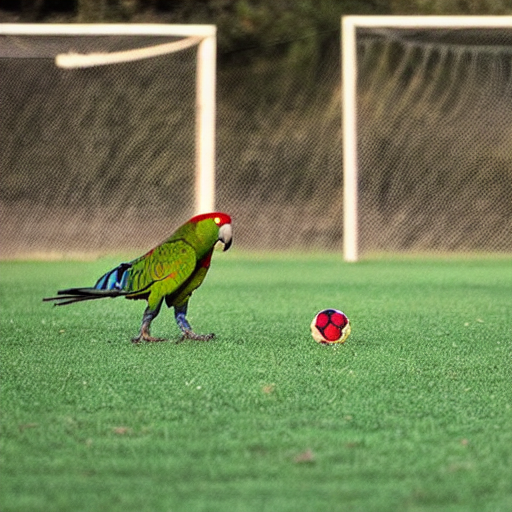

which can be used to retrieve the generated image of a parrot playing soccer.



In [32]:
show_output(output=output['output'])

## StableDiffusion 

In [20]:
tools = [SteamshipImageGenerationTool(model_name="stable-diffusion")]

In [21]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

In [25]:
output = mrkl.run("How would you visualize a Botero painting of hell?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image based on the given prompt.
Action: generate_image
Action Input: "A detailed text-2-image prompt describing an image of a Botero painting of hell."
Observation: 0F0B2195-6949-4E8B-B0D3-B43CF943F2A3
Thought: I now know the final answer.
Final Answer: 0F0B2195-6949-4E8B-B0D3-B43CF943F2A3

> Finished chain.


In [26]:
output

'0F0B2195-6949-4E8B-B0D3-B43CF943F2A3'

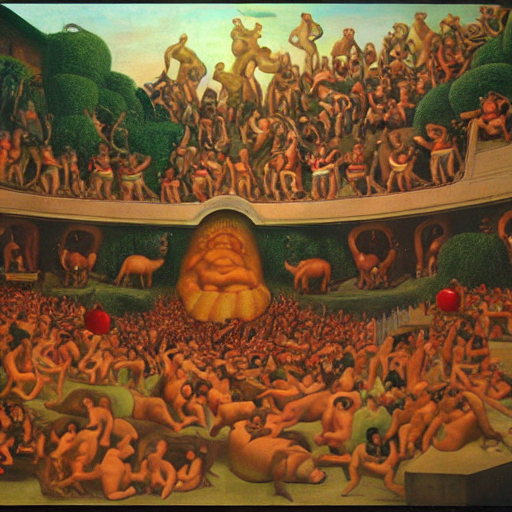

In [27]:
show_output(output=output)